In [15]:
import cv2
import numpy as np
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from superpoint.datasets.synthetic_shapes import SyntheticShapes
from utils import plot_imgs

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
config = {
    'primitives': 'all',
    'on-the-fly': True,
    'preprocessing': {'resize': [120, 160], 'blur_size': 21}
}
dataset = SyntheticShapes(**config)
data = dataset.get_test_set()

In [17]:
def draw_keypoints(img, corners, color):
    keypoints = [cv2.KeyPoint(c[1], c[0], 1) for c in np.stack(corners).T]
    return cv2.drawKeypoints(img.astype(np.uint8), keypoints, None, color=color)
def display(d):
    return draw_keypoints(d['image'][..., 0]*255, np.where(d['keypoint_map']), (0, 255, 0))

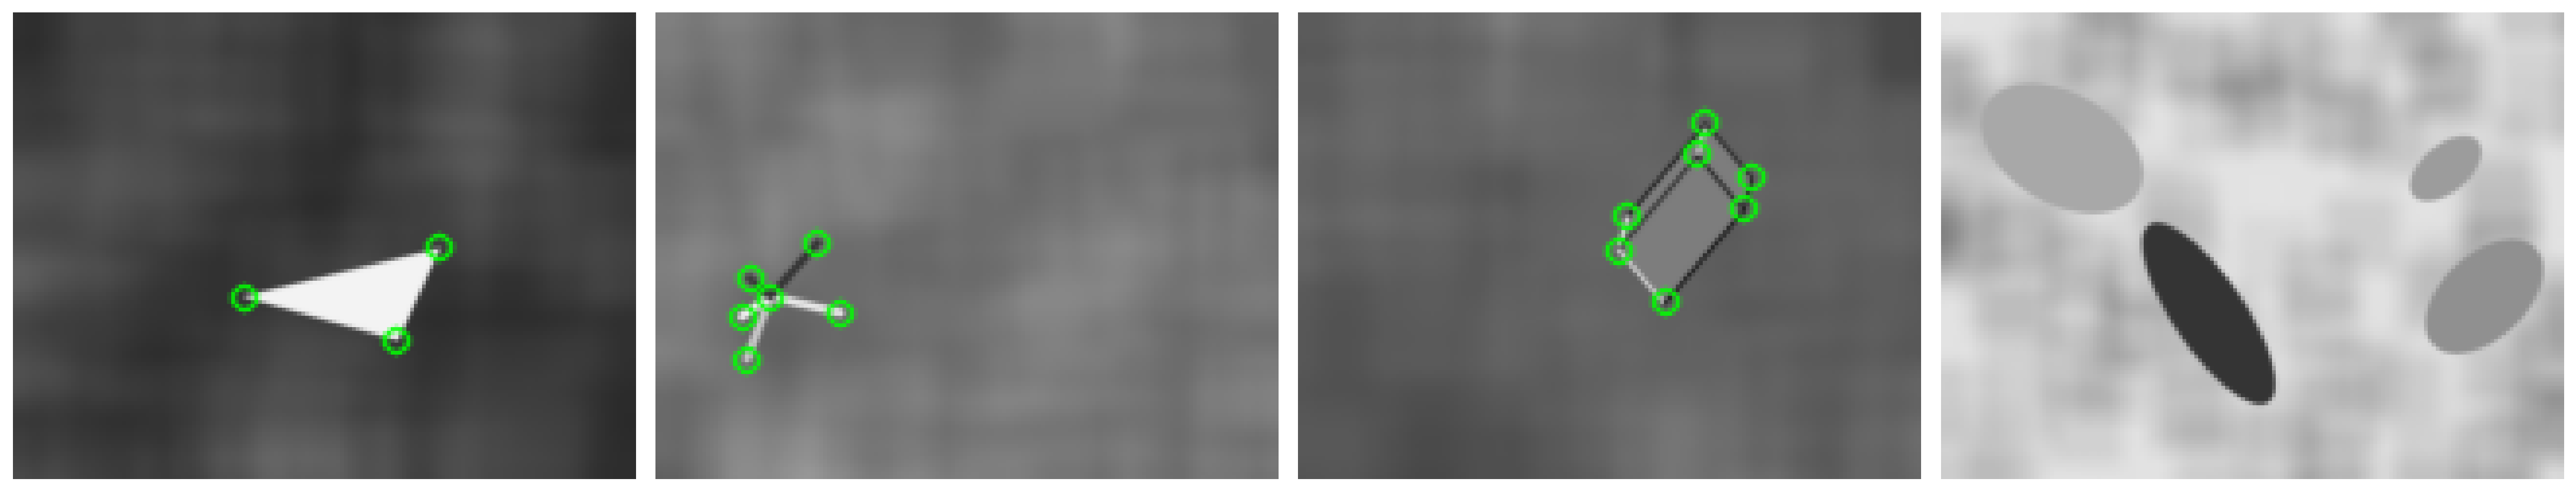

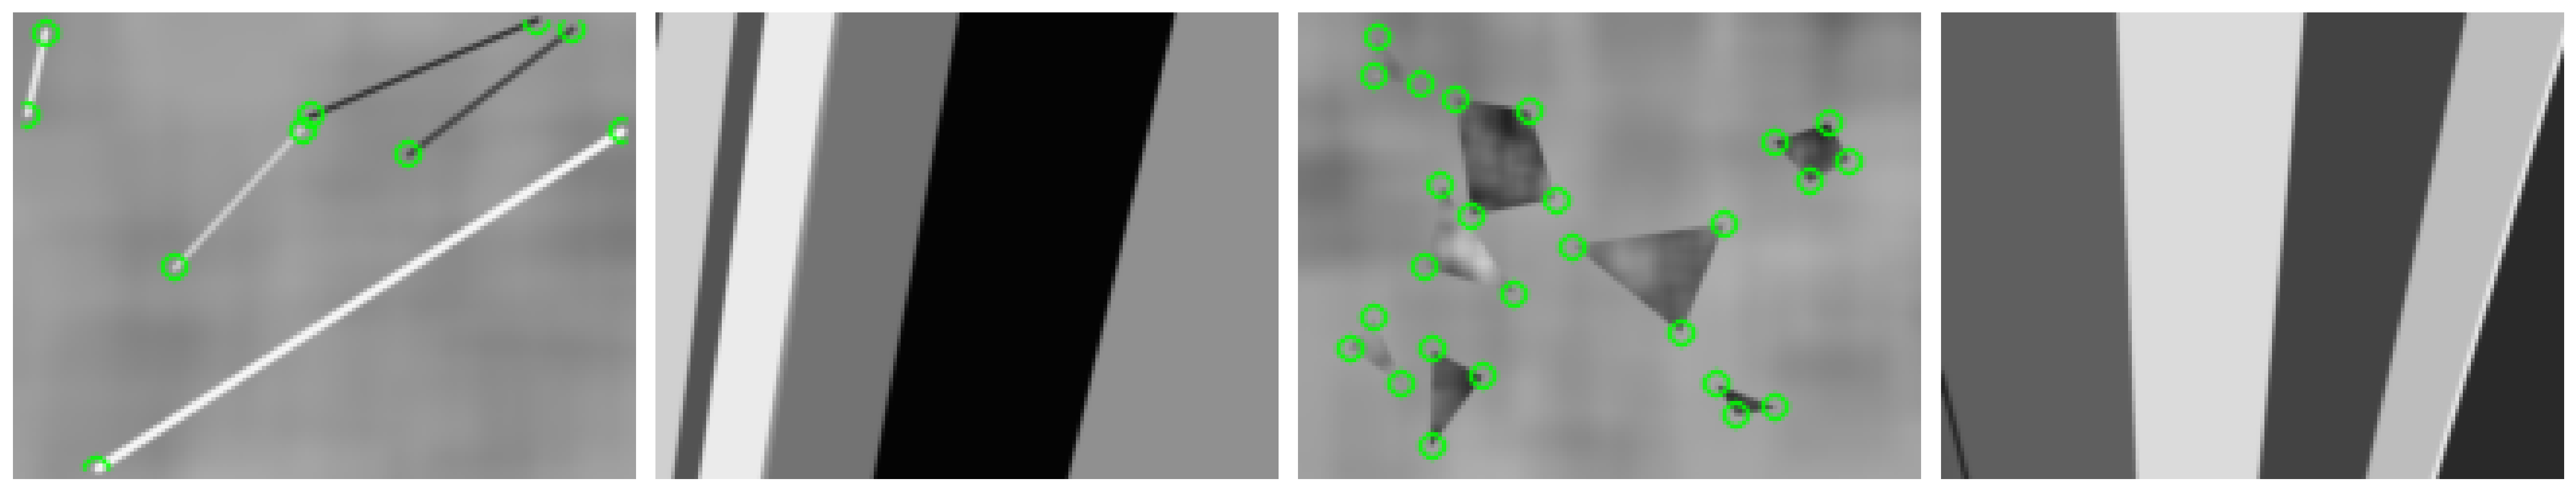

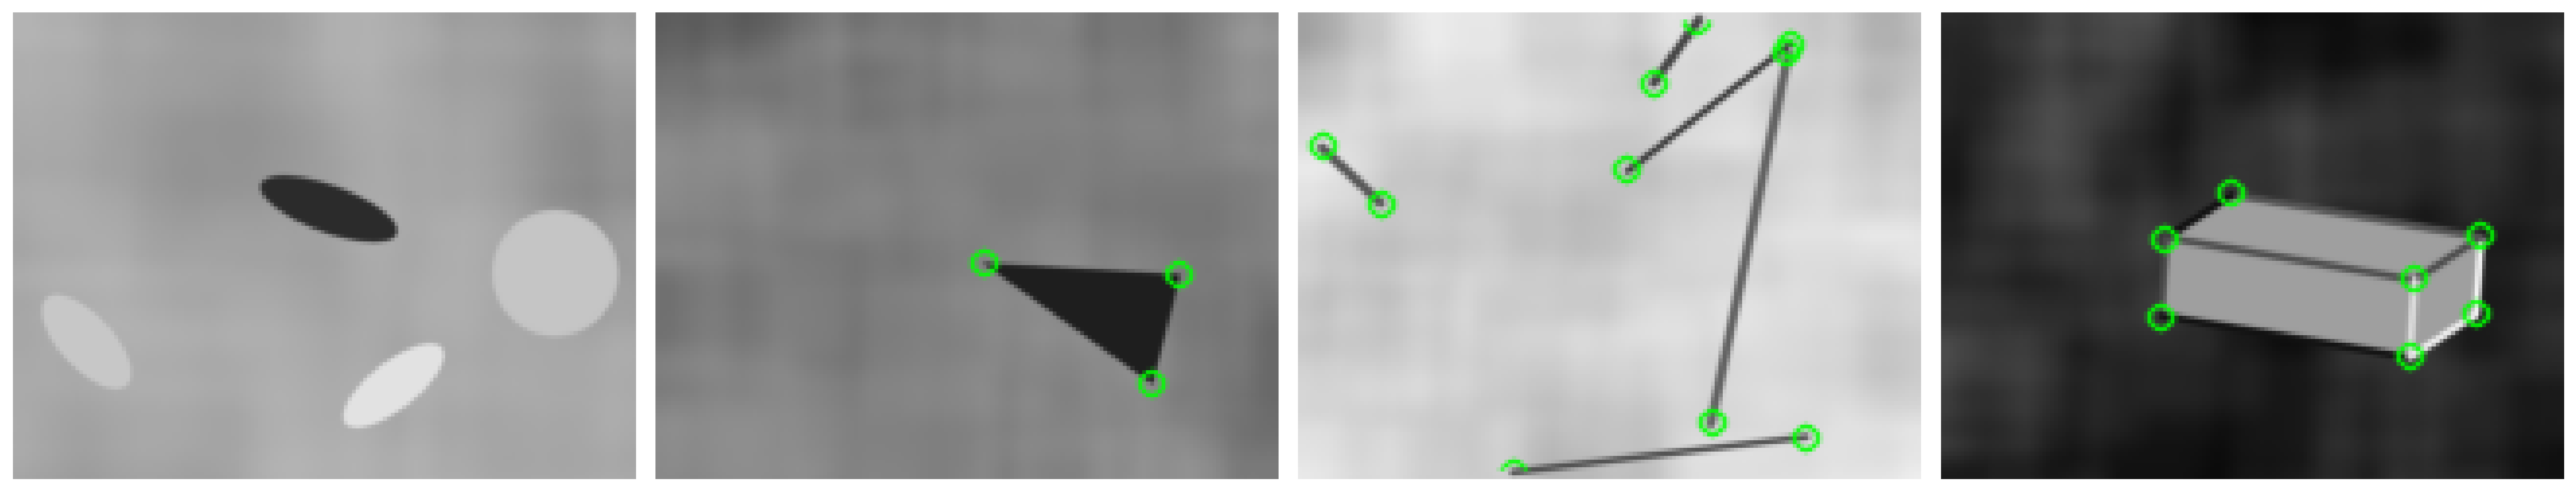

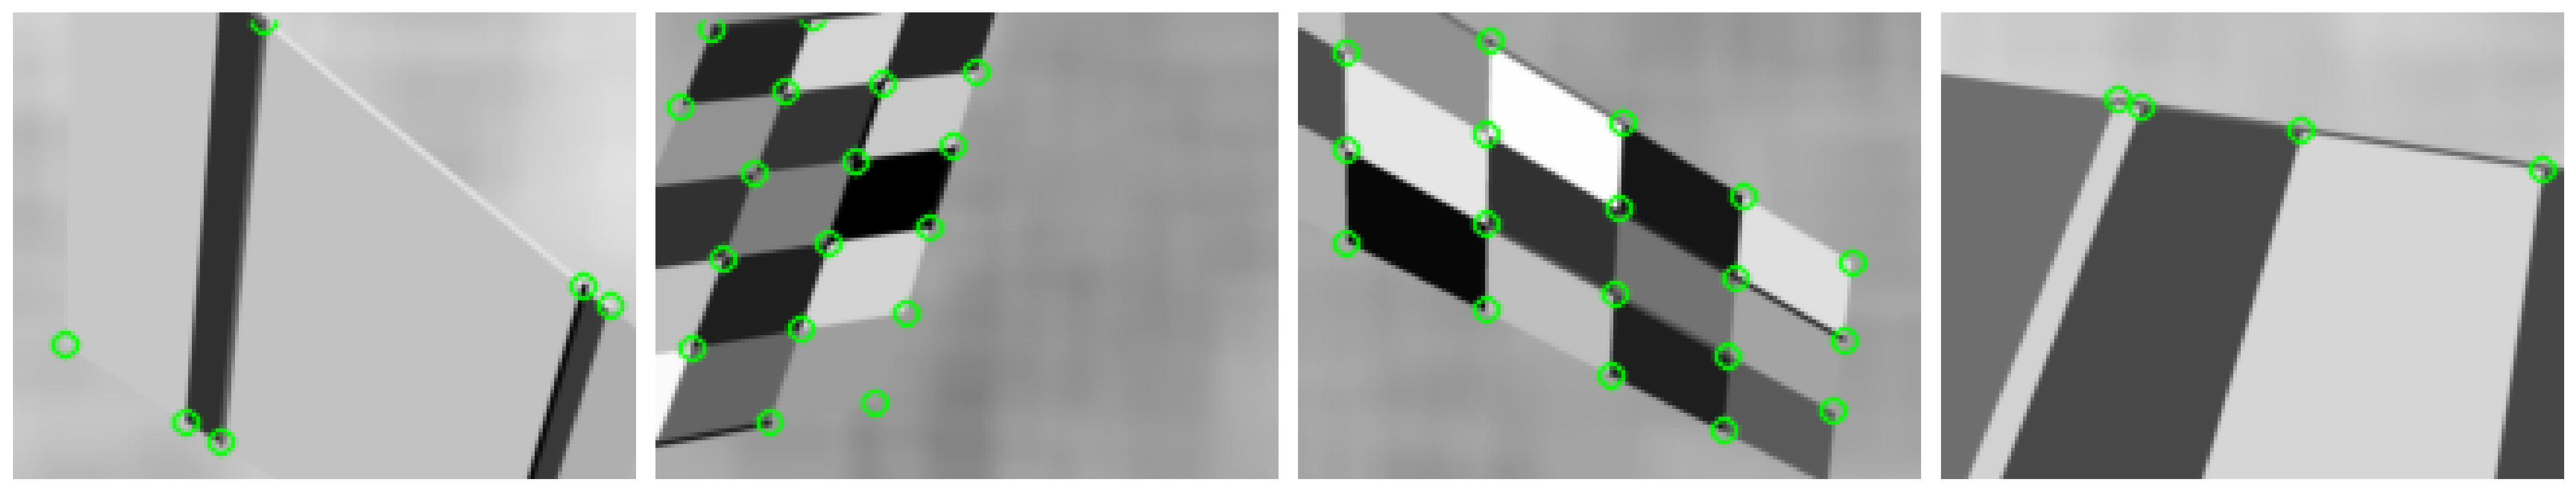

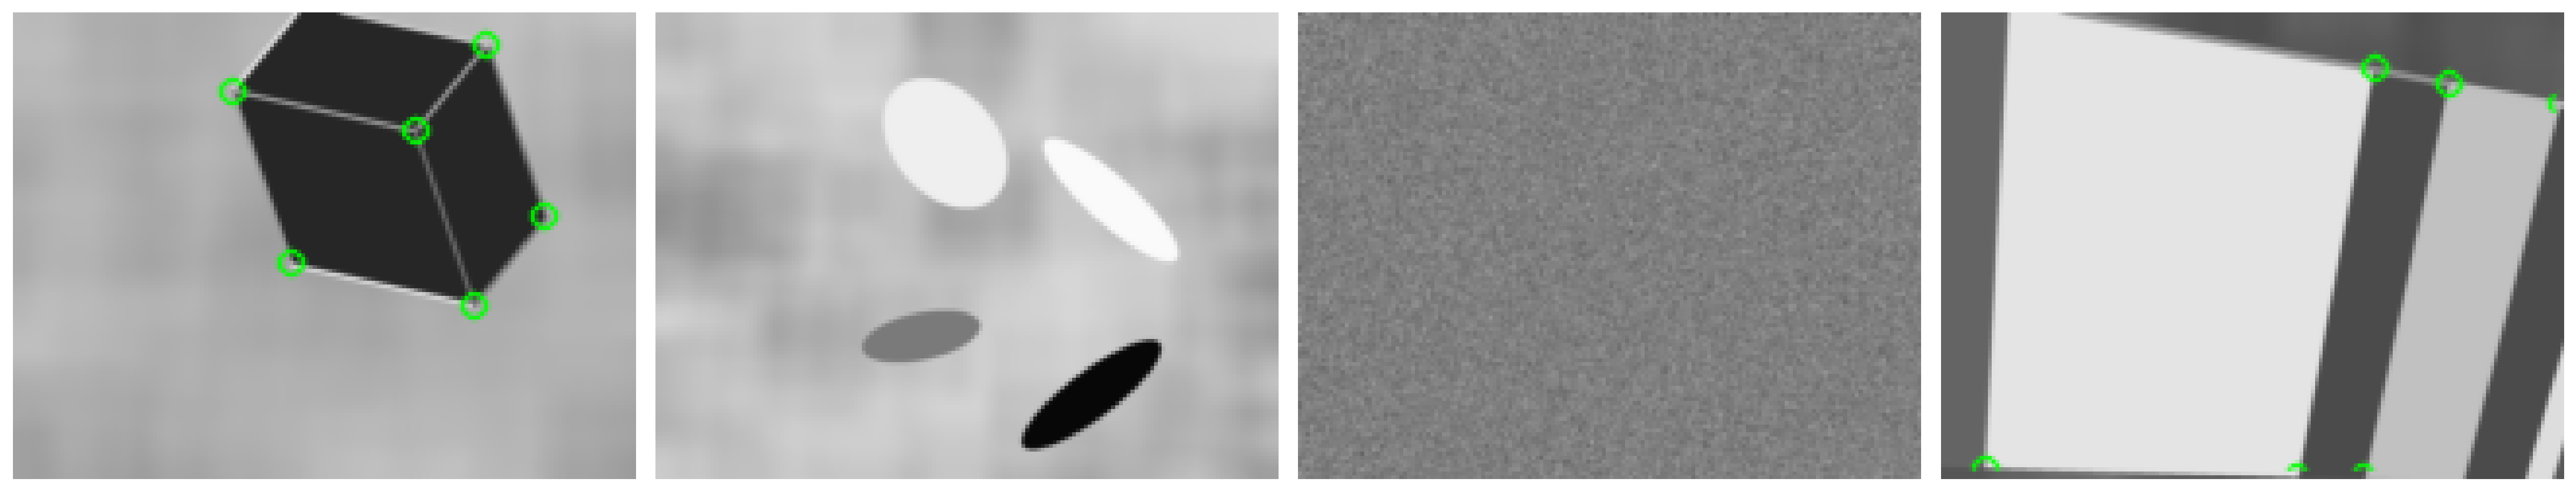

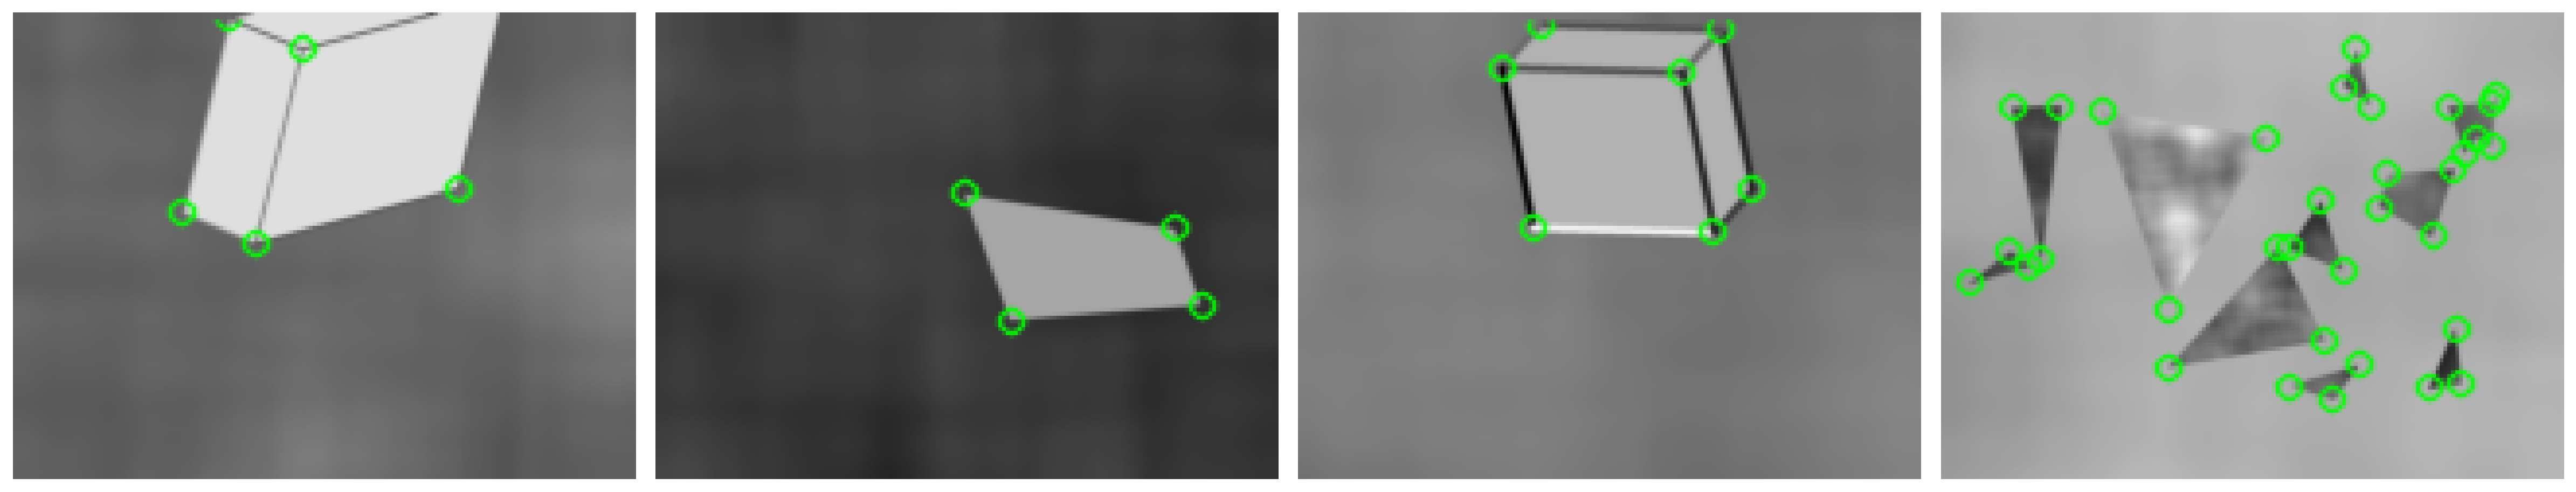

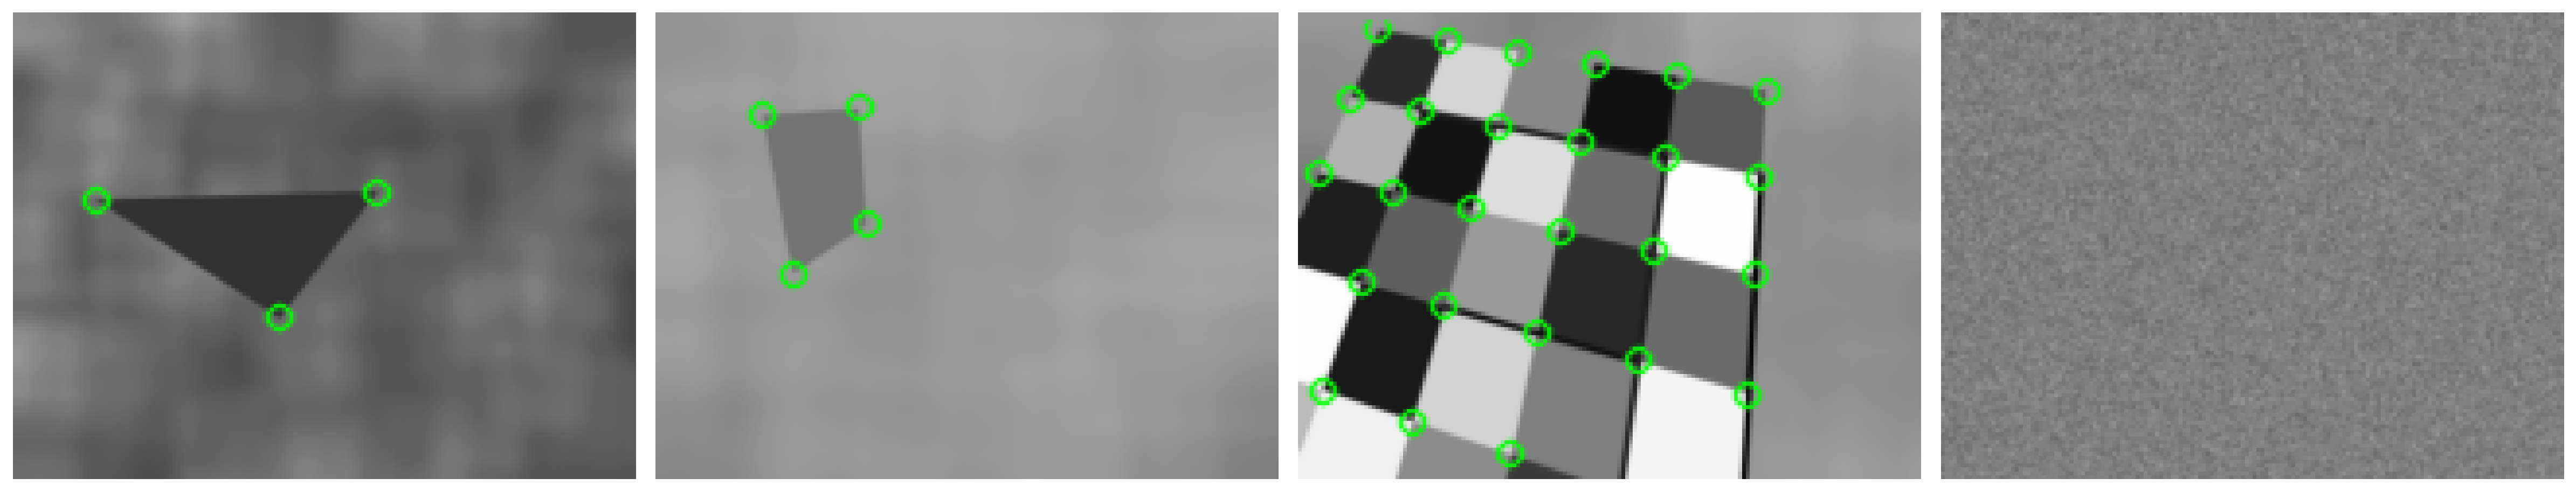

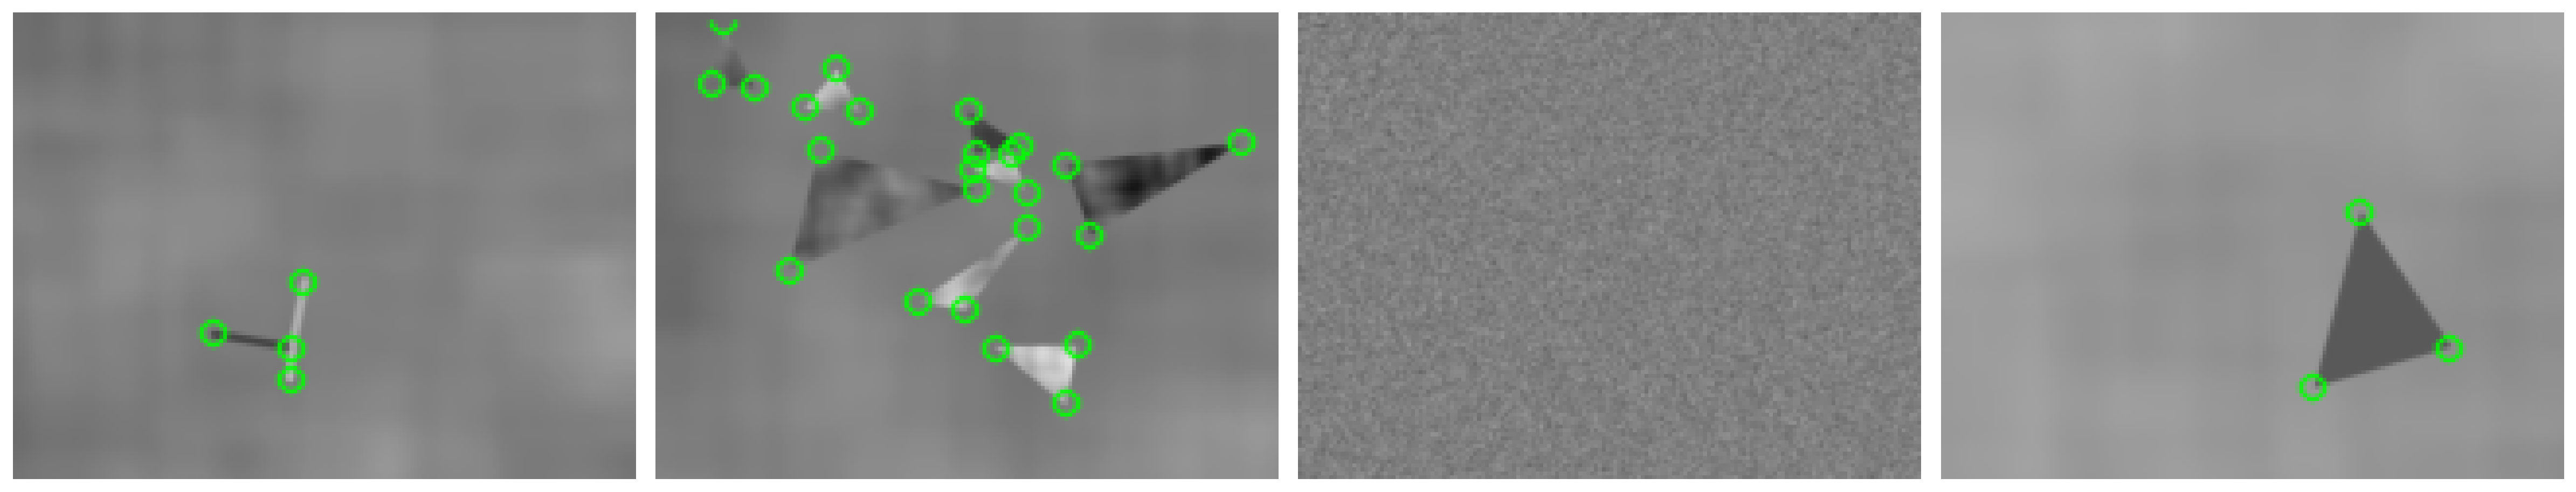

In [18]:
for i in range(8):
    plot_imgs([display(next(data))/255. for _ in range(4)], dpi=200)